<h1><u>Dataset Description</u></h1>

<u>Goal Recap</u> <br>
This project aims to analyze existing CAPTCHA and reCAPTCHA solving models to understand their design and effectiveness. Our goal is to build a machine learning model that can recognize and solve CAPTCHAs with an 85%+ accuracy rate.

<br> <u>Factors</u> <br>
We have two datasets: a CAPTCHA and reCAPTCHA dataset.
- All inputs in both datasets are images
- CAPTCHA images contain character sequences with noise, distortion, and variation in fonts/colors
- CAPTCHA characters are alphanumeric and are 5 characters long
- reCAPTCHA images involve object recognition (e.g., traffic lights, hydrants)

<br> <u>Target</u> <br>
- For CAPTCHA: Predict the correct alphanumeric sequence (filename = label)
- For reCAPTCHA: Classify image content into one of several object-based categories









---




<h1> <u>Original data Visualization</u> </h1>


<h2>Imports</h2>

In [14]:
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

<h2>Clone Datasets from github repo</h2>

In [15]:
! git clone https://github.com/HilariousCheese/MachineLearning-VS-CAPTCHAs.git

fatal: destination path 'MachineLearning-VS-CAPTCHAs' already exists and is not an empty directory.


## Dataset 1 Visualization CAPTCHA

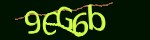

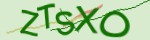

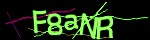

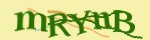

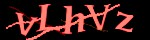

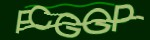

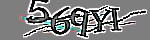

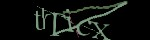

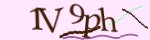

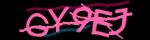

In [16]:
# cap_image_dir = "MachineLearning-VS-CAPTCHAs/datasets/CAPTCHA"
cap_image_dir = 'MachineLearning-VS-CAPTCHAs/datasets/CAPTCHA'

cap_all_images = os.listdir(cap_image_dir)

sample_images = random.sample(cap_all_images, 10)

for img_name in sample_images:
    img_path = os.path.join(cap_image_dir, img_name)
    img = Image.open(img_path)

    display(img)


In [17]:
#from google.colab import drive
#drive.mount('/content/drive')

<h3> Splitting datasets and one-hot encoding</h3>

In [18]:
from sklearn.model_selection import train_test_split

image_paths = [os.path.join(cap_image_dir, img) for img in cap_all_images]
labels = [img.split('.')[0] for img in cap_all_images]  # Assuming the filename (before the extension) is the label

cap_X_train, cap_X_test, cap_y_train, cap_y_test = train_test_split(image_paths, labels, test_size=0.2, random_state=42)

print(f"Training dataset size: {len(cap_X_train)} images")
print(f"Testing dataset size: {len(cap_X_test)} images")

Training dataset size: 40028 images
Testing dataset size: 10007 images


In [19]:
# Print the first few labels before one-hot encoding
print("First few labels in cap_y_train before one-hot encoding:")
print(cap_y_train[:5])  # Print first 5 labels (e.g., ['a1B2C', 'D4e5F', ...])

First few labels in cap_y_train before one-hot encoding:
['QqtOd', 'DVkgS', 'NqtEm', 'pRBV5', 'VbzD7']


# CNN

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, Activation, SpatialDropout2D
from keras.utils import to_categorical

In [21]:
# Normalize image pixel values to range [0, 1]
cap_X_train = np.array([np.array(Image.open(img).resize((128, 64))) / 255.0 for img in cap_X_train])
cap_X_test = np.array([np.array(Image.open(img).resize((128, 64))) / 255.0 for img in cap_X_test])

# One-hot encode labels
char_to_int = {char: idx for idx, char in enumerate('0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz')}
cap_y_train_encoded = [[char_to_int[char] for char in label] for label in cap_y_train]
cap_y_test_encoded = [[char_to_int[char] for char in label] for label in cap_y_test]

# Then one-hot encode each character
cap_y_train = np.array([to_categorical(label, num_classes=len(char_to_int)) for label in cap_y_train_encoded])
cap_y_test = np.array([to_categorical(label, num_classes=len(char_to_int)) for label in cap_y_test_encoded])

In [22]:
# Check label
int_to_char = {v: k for k, v in char_to_int.items()}

def decode_one_hot(one_hot_vector):
    return ''.join([int_to_char[np.argmax(char)] for char in one_hot_vector])

print("First few labels in cap_y_train after one-hot encoding (decoded):")
for i in range(5):
    decoded_label = decode_one_hot(cap_y_train[i])
    print(f"Original: {cap_y_train[i]} => Decoded: {decoded_label}")


First few labels in cap_y_train after one-hot encoding (decoded):
Original: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0.

In [27]:
 captcha_length = 5  # If your captchas are 5 characters
 num_classes = len(char_to_int)  # Should be 62 if using 0-9, A-Z, a-z

# # Model
# inputs = keras.Input(shape=(64, 128, 3))

# x = keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
# x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
# x = keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
# x = keras.layers.Flatten()(x)
# x = keras.layers.Dropout(0.5)(x)

# # For multiple character outputs
# outputs = [Dense(num_classes, activation='softmax', name=f'char_{i}')(x) for i in range(captcha_length)]

# model = keras.Model(inputs=inputs, outputs=outputs)

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     metrics=['accuracy'] * captcha_length
# )

inputs = keras.Input(shape=(64, 128, 3))

x = keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D((2, 2))(x)

x = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D((2, 2))(x)

x = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.MaxPooling2D((2, 2))(x)

x = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.SpatialDropout2D(0.3)(x)
#x = keras.layers.GlobalMaxPooling2D()(x)
x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.5)(x)

# One Dense output per character
outputs = [Dense(num_classes, activation='softmax', name=f'char_{i}')(x) for i in range(captcha_length)]

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] * captcha_length
)

# loss_weights = [1.5, 2.0, 2.0, 2.0, 1.5]  # Boost loss for center characters

# model.compile(
#     optimizer='adam',
#     loss='categorical_crossentropy',
#     loss_weights=loss_weights,
#     metrics=['accuracy'] * captcha_length
# )


In [28]:
# Assume cap_y_train shape = (40028, 5, 62)

# Split labels into a list for each character
cap_y_train_split = [cap_y_train[:, i, :] for i in range(captcha_length)]
cap_y_test_split = [cap_y_test[:, i, :] for i in range(captcha_length)]

history = model.fit(
    cap_X_train, cap_y_train_split,
    validation_data=(cap_X_test, cap_y_test_split),
    epochs=30,
    batch_size=32
)


Epoch 1/30
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - char_0_accuracy: 0.0327 - char_0_loss: 4.0926 - char_1_accuracy: 0.0262 - char_1_loss: 4.1502 - char_2_accuracy: 0.0244 - char_2_loss: 4.1444 - char_3_accuracy: 0.0226 - char_3_loss: 4.1450 - char_4_accuracy: 0.0301 - char_4_loss: 4.1107 - loss: 20.6430 - val_char_0_accuracy: 0.1146 - val_char_0_loss: 3.4256 - val_char_1_accuracy: 0.0611 - val_char_1_loss: 3.9099 - val_char_2_accuracy: 0.0557 - val_char_2_loss: 3.9391 - val_char_3_accuracy: 0.0550 - val_char_3_loss: 3.9233 - val_char_4_accuracy: 0.1191 - val_char_4_loss: 3.4666 - val_loss: 18.6647
Epoch 2/30
1251/1251 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - char_0_accuracy: 0.1954 - char_0_loss: 3.0281 - char_1_accuracy: 0.0707 - char_1_loss: 3.8145 - char_2_accuracy: 0.0657 - char_2_loss: 3.8232 - char_3_accuracy: 0.0639 - char_3_loss: 3.8364 - char_4_accuracy: 0.1926 - char_4_loss: 3.0913 - loss: 17.5934 - val_char_0_accuracy: 0.3985 - val_char_0_loss: 2.1514 - val_char_1_accurac

In [29]:
score = model.evaluate(cap_X_test, cap_y_test_split, verbose=0)
print(score)

print("Val_Char_0: ", score[6])
print("Val_Char_1: ", score[7])
print("Val_Char_2: ", score[8])
print("Val_Char_3: ", score[9])
print("Val_Char_4: ", score[10])

[5.413029670715332, 0.4009208083152771, 1.3749359846115112, 1.8626500368118286, 1.3661561012268066, 0.4086109399795532, 0.8628959655761719, 0.5995802879333496, 0.4409913122653961, 0.6059758067131042, 0.8636954426765442]
Val_Char_0:  0.8628959655761719
Val_Char_1:  0.5995802879333496
Val_Char_2:  0.4409913122653961
Val_Char_3:  0.6059758067131042
Val_Char_4:  0.8636954426765442


In [30]:
print("First sample of cap_y_train:", cap_y_train[0])
print("Shape of the first sample:", cap_y_train[0].shape)  # Expected: (5, 62)


First sample of cap_y_train: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Shape